<a href="https://colab.research.google.com/github/SLKS-CODE/codealpha_tasks1/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle pandas numpy scikit-learn matplotlib seaborn


In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json or kaggle(3).json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshanakamalis","key":"552075240ea432f1007211e20d0bb5f9"}'}

In [ ]:
import os

# Create the directory for Kaggle configuration
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded kaggle.json to the correct location
!mv kaggle.json /root/.kaggle/

# Set proper permissions
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vijayaadithyanvg/car-price-predictionused-cars
!unzip car-price-predictionused-cars.zip


Dataset URL: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars
License(s): CC0-1.0
car-price-predictionused-cars.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  car-price-predictionused-cars.zip
replace car data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
cars_data=pd.read_csv('/content/car data.csv')

In [ ]:
# Step 1: Inspect the data
print(cars_data.head())  # View the first few rows
print(cars_data.info())  # Check for missing values and data types
print(cars_data.describe())  # View summary statistics

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [ ]:
#STEP2:NULL VALUE CHECK
print("\nNull value check:")
print(cars_data.isnull().sum())


Null value check:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Step 3: Check for duplicate rows and handle them
print("\nDuplicated rows count:", cars_data.duplicated().sum())


Duplicated rows count: 2


In [ ]:
#STEP4:DROP DUPLICATES
cars_data = cars_data.drop_duplicates()
print("Dataset shape after dropping duplicates:", cars_data.shape)

Dataset shape after dropping duplicates: (299, 9)


In [ ]:
#STEP5:DATA PREPROCESSING
cars_data["Age"] = 2024 - cars_data["Year"]
cars_data = cars_data.drop(["Year", "Car_Name"], axis=1)  # Drop unnecessary columns

In [ ]:
#STEP6:Encode categorical features (Fuel_Type, Seller_Type, Transmission)
cars_data = pd.get_dummies(cars_data, drop_first=True)

In [ ]:
# Step 7: Split features and target
X = cars_data.drop("Selling_Price", axis=1)  # Features
y = cars_data["Selling_Price"]  # Target variable


In [ ]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#STEP 9:Display the train-test split percentages
print(f"\nTotal dataset size: {len(X)}")
print(f"Training dataset size: {len(X_train)} ({len(X_train) / len(X) * 100:.1f}%)")
print(f"Testing dataset size: {len(X_test)} ({len(X_test) / len(X) * 100:.1f}%)")


Total dataset size: 299
Training dataset size: 239 (79.9%)
Testing dataset size: 60 (20.1%)


In [ ]:
# Step 10: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 11: Make predictions and evaluate the model
y_pred = model.predict(X_test)


In [ ]:
#STEP 12: Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
#STEP 13:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 6.373125106260704
R² Score: 0.7527233824220487


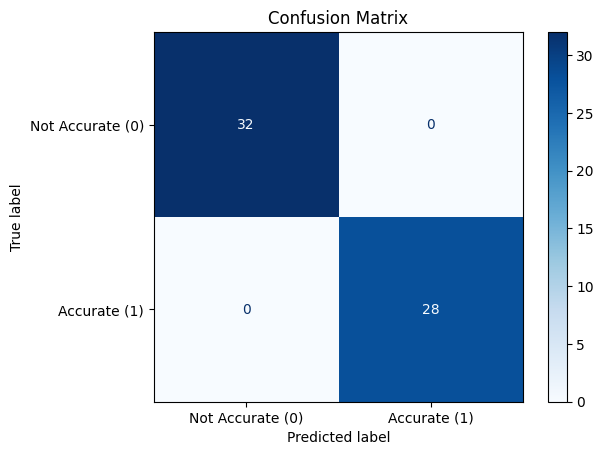


Model Metrics:
Accuracy: 100.00%
Precision: 100.00%


In [ ]:
#STEP14: Define a threshold for "accurate" predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
import matplotlib.pyplot as plt

# Define a threshold for "accurate" predictions
threshold = 0.2  # 20% tolerance

# Binary classification based on threshold
accuracy_threshold = y_test * threshold
y_test_binary = ((y_test - accuracy_threshold <= y_pred) & (y_pred <= y_test + accuracy_threshold)).astype(int)
y_pred_binary = ((y_test - accuracy_threshold <= y_pred) & (y_pred <= y_test + accuracy_threshold)).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Accurate (0)", "Accurate (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy and precision
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, zero_division=1)

# Print metrics
print("\nModel Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

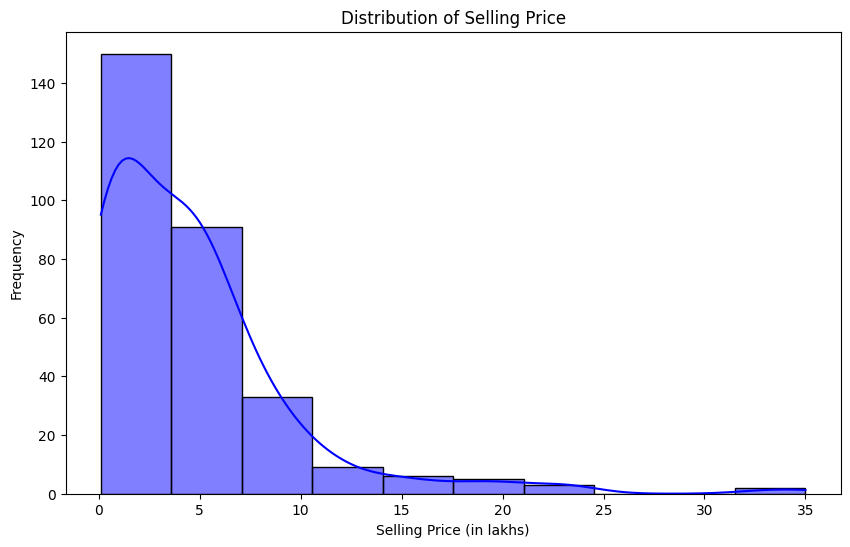

In [ ]:
# Step 15: Visualize the selling price distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(cars_data["Selling_Price"], kde=True, bins=10, color="blue")
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (in lakhs)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#STEP16: TESTING
sample_data = {
"Present_Price": 5.59,  # Example: Current price in lakhs
"Kms_Driven": 27000,    # Example: Kilometers driven
"Owner": 0,             # Number of previous owners
"Age": 10,              # Car age (2024 - year)
"Fuel_Type_Diesel": 0,  # Is the fuel type Diesel? (1 for Yes, 0 for No)
"Fuel_Type_Petrol": 1,  # Is the fuel type Petrol? (1 for Yes, 0 for No)
"Seller_Type_Individual": 0,  # Is the seller an individual? (1 for Yes, 0 for Dealer)
"Transmission_Manual": 1  # Is the transmission manual? (1 for Yes, 0 for Automatic)
}

# Convert the sample data to a DataFrame with correct column names
import pandas as pd # Make sure pandas is imported
sample_df = pd.DataFrame([sample_data])
# Rename the columns to match the training data
sample_df = sample_df.rename(columns={
"Kms_Driven": "Driven_kms",
"Seller_Type_Individual": "Selling_type_Individual"
})
# Predict the price
predicted_price = model.predict(sample_df)[0]
print(f"\nPredicted Selling Price: {predicted_price:.2f} lakhs")


Predicted Selling Price: 3.94 lakhs
